In [ ]:
# 한글폰트 설치 (시각화 표에서 한글 글자가 꺠지는 경우)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# --> 런타임 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and direc

In [ ]:
# 한글 폰트 지정
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name


In [ ]:
#Interactive charts and maps for Python,
# https://anaconda.org/plotly/plotly
# conda install -c plotly plotly

# 참고 : https://wikidocs.net/180747

In [ ]:
# + 패키지
from IPython.display import Image
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib

In [ ]:
# plotly의 2가지에 대한 방식 : express // graph_objects
# express : 데이터 입력만으로 쉽게 그래프 표현 가능 but 세부조정이 어려움
# graph_objects : 그래프의 세부적인 조정이 용이하지만,
#                 세부적인 모든 것들을 다 설정해야하므로 코드 양이 많아짐
import plotly.express as px
import plotly.graph_objects as go
# 혹시 주피터 노트북에 안 나타날 경우에 대해서
from plotly.offline import init_notebook_mode, iplot

In [ ]:
# csv 불러오기
path = "/content/real_movie_3.csv"
ml_df = pd.read_csv(path, encoding = 'cp949')

In [ ]:
ml_df.head()

,Movie_name,Image_name,Movie_type,SpecIal,Month,sales_n,Number_of_moviegoers,sales,Genre,Genre_comedy,...,part_3,part_4,part_5,part_6,part_7,part_8,part_9,part_10,part_11,part_12
0,극한직업,극한직업.jpg,2D,0,1,1,16264944,1.400000e+11,코미디,1,...,1,0,0,0,0,0,0,0,0,0
1,국제시장,국제시장.jpg,"필름,2D",0,12,1,14245998,1.110000e+11,드라마,0,...,1,0,0,0,0,0,0,0,0,0
2,어벤져스: 엔드게임,어벤져스- 엔드게임.jpg,"2D,3D,4D,IMAX",3,4,1,13934592,1.220000e+11,액션,0,...,1,1,1,1,0,0,0,0,0,0
3,베테랑,베테랑.jpg,"필름,2D",0,8,1,13395400,1.050000e+11,액션,0,...,1,0,1,0,0,0,0,0,0,0
4,서울의 봄,서울의 봄.jpg,"2D,IMAX",1,11,1,13127637,1.280000e+11,드라마,0,...,0,1,1,1,1,1,1,0,0,0


장르별 영화 개수 count 차트 (등급별)

In [ ]:
# 가로형 참고

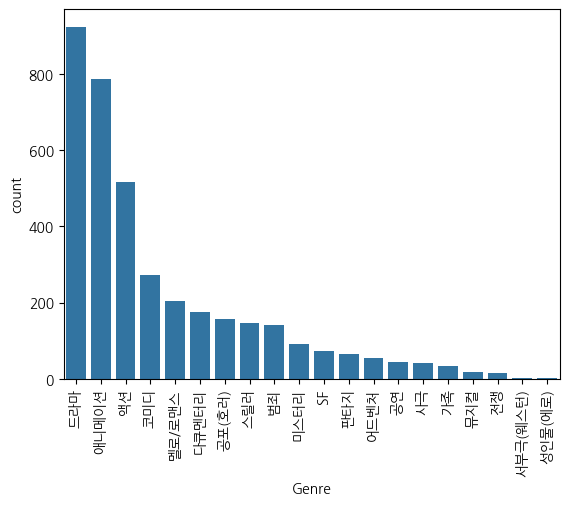

In [ ]:
# -> 종류별 갯수 : countplot
# -> 해당하는 정보 : Gerne
#내림차순 정리
sns.countplot(data = ml_df, x="Genre",
             order = ml_df["Genre"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# 1) 흥행 등급별 영화 장르 개수

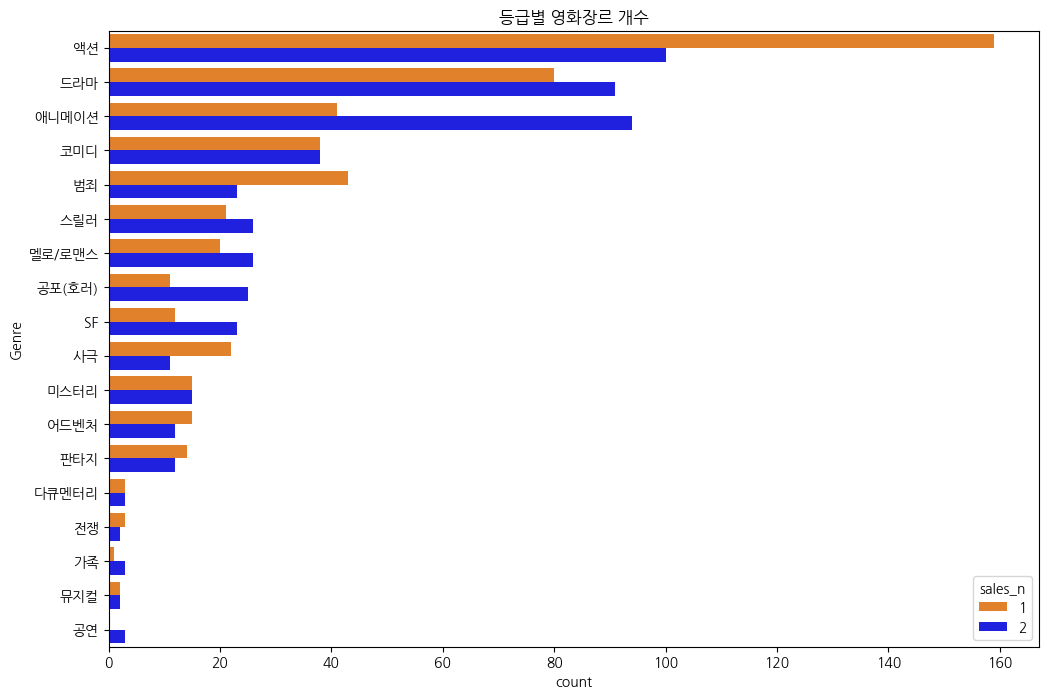

In [ ]:
# 'sales_n' (등급)과 'Genre' (장르)별로 개수를 집계합니다.
grouped_df2 = ml_df.groupby(['sales_n', 'Genre']).size().reset_index(name='count')

# 3등급을 제외한 데이터만 필터링합니다.
filtered_df2 = grouped_df2[grouped_df2['sales_n'] != 3]

# 장르를 내림차순으로 정렬합니다.
genre_order = filtered_df2.groupby('Genre')['count'].sum().sort_values(ascending=False).index

# Barplot을 사용해 시각화합니다.
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_df2, y='Genre', x='count', hue='sales_n', order=genre_order, palette=['tab:orange', 'blue'])
plt.yticks(rotation=0)  # y축 레이블을 회전하지 않음
plt.title('등급별 영화장르 개수')
plt.show()

In [ ]:
# 등급별 표를 분리하여 표기 (1,2,3등급)

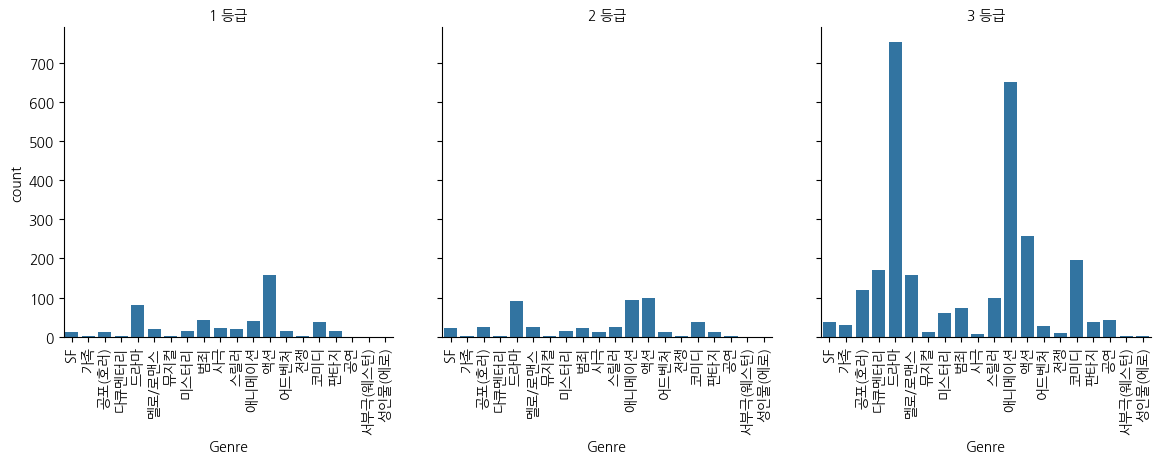

In [ ]:
grouped_df1 = ml_df.groupby(['sales_n', 'Genre']).size().reset_index(name='count')

# FacetGrid를 사용해 등급별로 서브플롯을 생성합니다.
g = sns.FacetGrid(grouped_df, col="sales_n", col_wrap=3, height=4)
g.map(sns.barplot, "Genre", "count", order=grouped_df['Genre'].unique())
g.set_xticklabels(rotation=90)
g.set_titles(col_template="{col_name} 등급")
plt.show()

In [ ]:
# 등급별 표를 분리하여 표기 (1,2등급) *3등급 제외

In [ ]:
filtered_df = grouped_df1[grouped_df1['sales_n'] != 3]

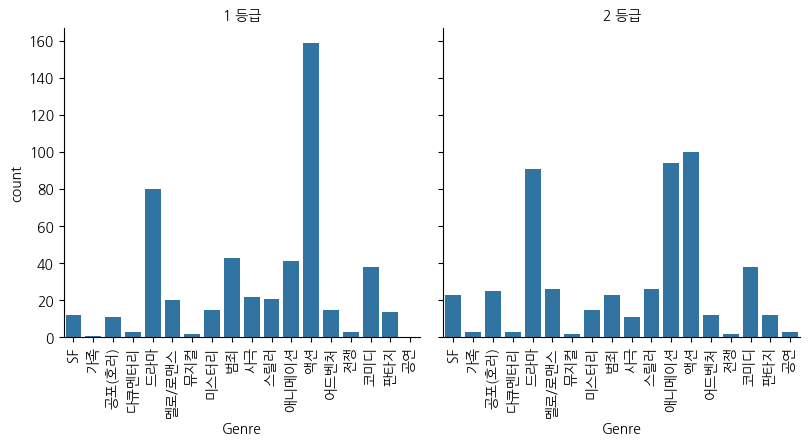

In [ ]:
g = sns.FacetGrid(filtered_df, col="sales_n", col_wrap=3, height=4)
g.map(sns.barplot, "Genre", "count", order=filtered_df['Genre'].unique())
g.set_xticklabels(rotation=90)
g.set_titles(col_template="{col_name} 등급")
plt.show()

개봉 월별 영화 개수 count 차트 (등급별)

In [ ]:
grouped_df_m = ml_df.groupby(['sales_n', 'Month']).size().reset_index(name='count')

In [ ]:
filtered_df_m = grouped_df_m[grouped_df_m['sales_n'] != 3]

In [ ]:
#개봉 월별 영화 개수 표기(1,2등급) *3등급 제외

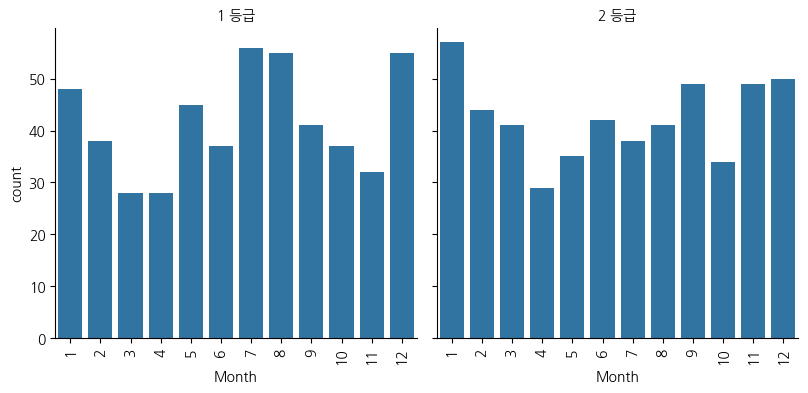

In [ ]:
g = sns.FacetGrid(filtered_df_m, col="sales_n", col_wrap=3, height=4)
g.map(sns.barplot, "Month", "count", order=filtered_df_m['Month'].unique())
g.set_xticklabels(rotation=90)
g.set_titles(col_template="{col_name} 등급")
plt.show()

In [ ]:
# 차트에 등급별 개수 함께 표기

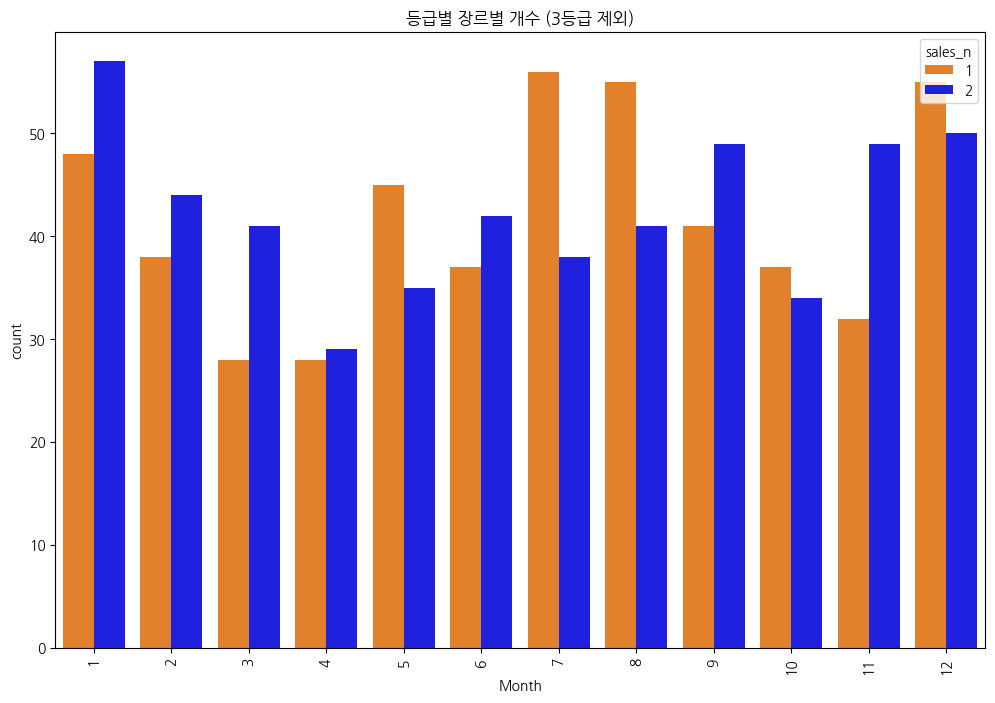

In [ ]:
grouped_df_m2 = ml_df.groupby(['sales_n', 'Month']).size().reset_index(name='count')


# 3등급을 제외한 데이터만 필터링합니다.
filtered_df_m2 = grouped_df_m2[grouped_df_m2['sales_n'] != 3]

# Barplot을 사용해 시각화합니다.
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_df_m2, x='Month', y='count', hue='sales_n', palette=['tab:orange', 'blue'] )
plt.xticks(rotation=90)
plt.title('등급별 장르별 개수 (3등급 제외)')
plt.show()


In [ ]:
# (참고) 가로형으로 표기

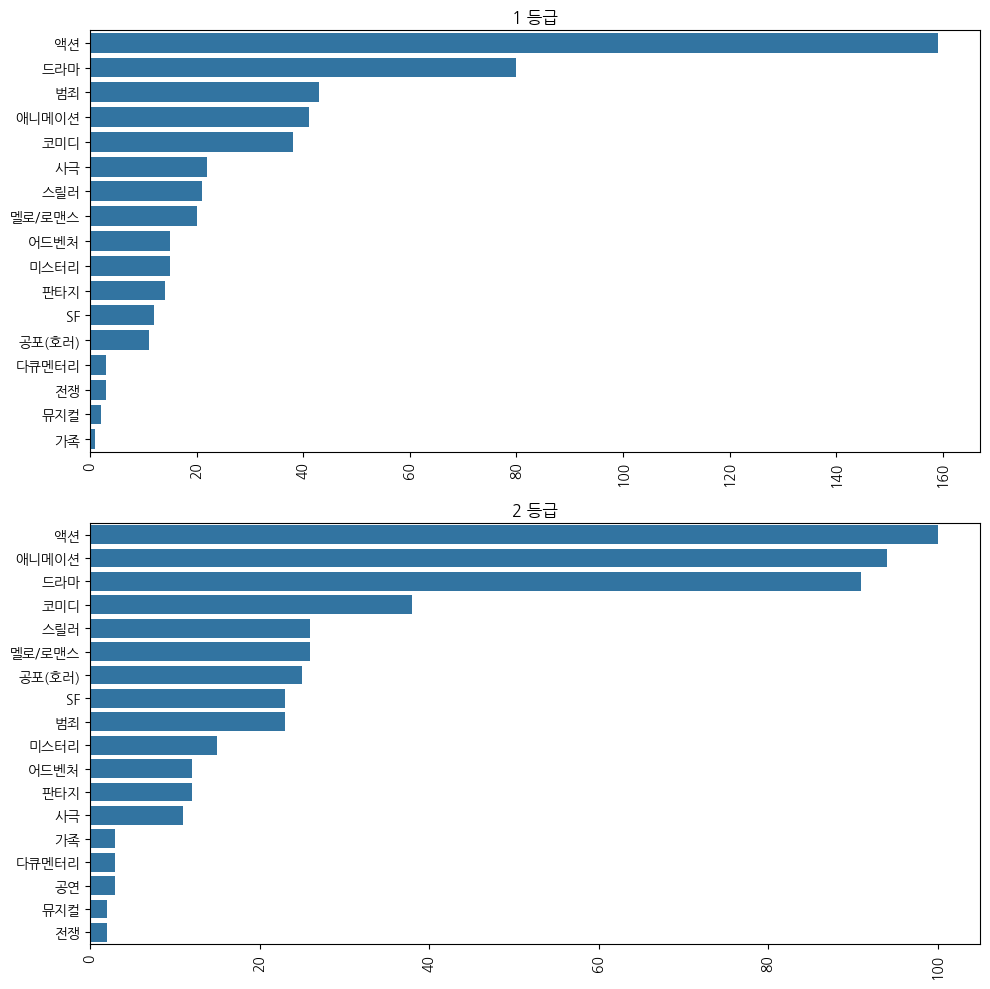

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 등급별로 데이터를 분할합니다.
grouped = filtered_df.groupby('sales_n')

# 플롯을 그리기 위한 전체 그림 객체와 축을 생성합니다.
fig, axes = plt.subplots(len(grouped), 1, figsize=(10, 5*len(grouped)))

# 각 등급별로 내림차순으로 정렬하고 바 차트를 그립니다.
for i, (sales_n, data) in enumerate(grouped):
    # 데이터를 'count' 열을 기준으로 내림차순으로 정렬합니다.
    sorted_data = data.sort_values(by='count', ascending=False)

    # 가장 큰 값 3개를 식별합니다.
    top_3 = sorted_data.head(3)

    # 바 차트를 그립니다.
    sns.barplot(data=sorted_data, x='count', y='Genre', ax=axes[i])
    axes[i].set_title(f"{sales_n} 등급")
    axes[i].set_xlabel('')  # x축 레이블 제거
    axes[i].set_ylabel('')  # y축 레이블 제거
    axes[i].tick_params(axis='x', rotation=90)  # x축 레이블 회전

    # 가장 큰 값 3개를 가진 바의 색상을 변경합니다.
    for bar in axes[i].patches:
        if bar.get_height() in top_3['count'].values:
            bar.set_color('orange')

# 그림을 보여줍니다.
plt.tight_layout()
plt.show()


In [ ]:
# (참고) 가로형으로 등급별 분리하여 표기

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



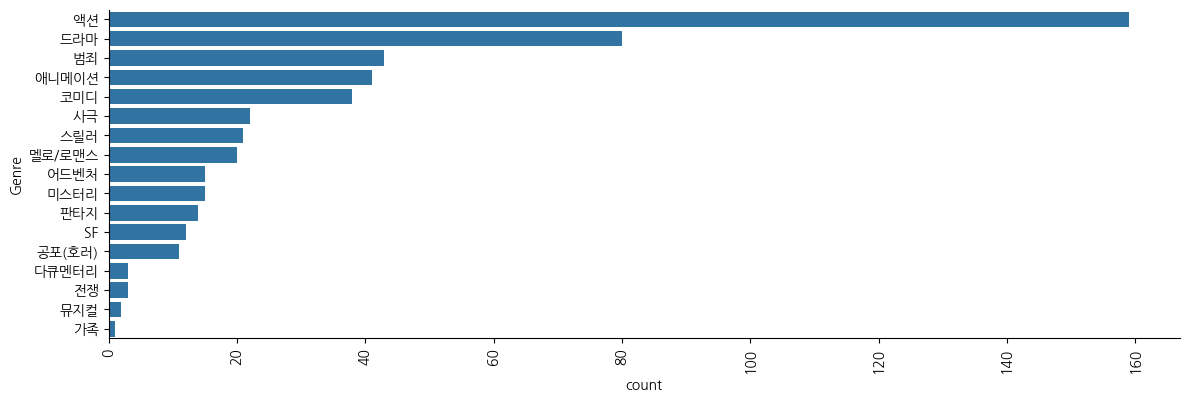

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



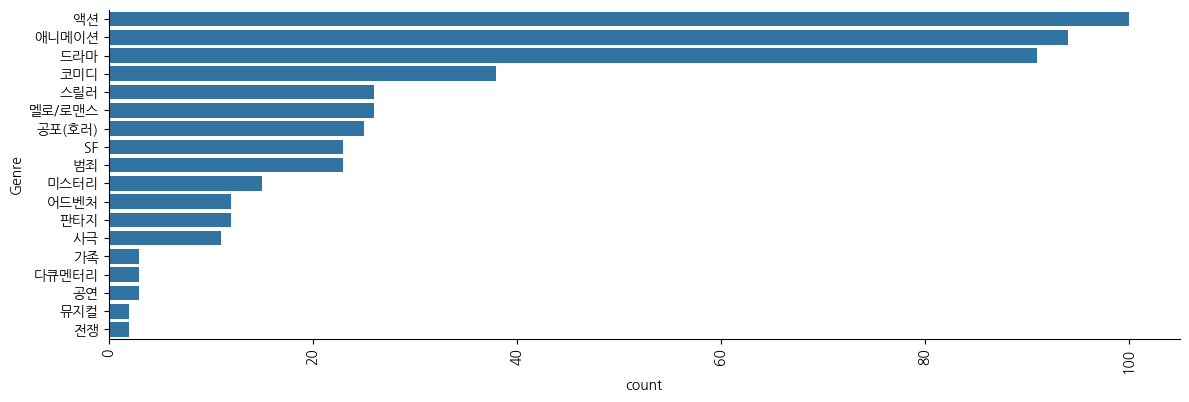

In [ ]:
# 등급별로 데이터를 분할합니다.
grouped = filtered_df.groupby('sales_n')

# 각 등급별로 내림차순으로 정렬하고 FacetGrid를 생성합니다.
for sales_n, data in grouped:
    # 데이터를 'count' 열을 기준으로 내림차순으로 정렬합니다.
    sorted_data = data.sort_values(by='count', ascending=False)

    # FacetGrid를 사용해 등급별로 서브플롯을 생성합니다.
    g = sns.FacetGrid(sorted_data, height=4, aspect=3)
    g.map(sns.barplot, "count", "Genre")

    # 가로로 볼 때 x축 레이블 회전
    plt.xticks(rotation=90)

    # 서브플롯 제목 설정
    g.set_titles(row_template="{row_name} 등급")

    plt.show()